**Color Space Transformation**

for **image classification** - CIFAR10 dataset

**HSV** vs **YCbCr** vs **LAB**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.decomposition import PCA
import cv2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

def transform_color_space(image, color_space='LAB'):  # if you want to switch to HSV or YCbCr, change this line from color_space='LAB' to color_space='HSV' or 'YCbCr'
    if color_space == 'HSV':
        return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    elif color_space == 'LAB':
        return cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    elif color_space == 'YCbCr':
        return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def preprocess_with_color_space(data, color_space='LAB'):  # if you want to switch to HSV or YCbCr, change this line from color_space='LAB' to color_space='HSV' or 'YCbCr'
    processed_data = []
    for image in data:
        transformed_image = transform_color_space(image, color_space=color_space)
        flattened_image = transformed_image.flatten()
        processed_data.append(flattened_image)
    
    return np.array(processed_data)

x_train = preprocess_with_color_space(x_train, color_space='LAB')# if you want to switch to HSV or YCbCr, change this line from color_space='LAB' to color_space='HSV' or 'YCbCr'
x_test = preprocess_with_color_space(x_test, color_space='LAB')# if you want to switch to HSV or YCbCr, change this line from color_space='LAB' to color_space='HSV' or 'YCbCr'



class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Run this part ONLY if you want to apply PCA to the dataset**

In [33]:
pca = PCA(n_components=50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

**k Nearest Neighbor Classifier** 

*choose value for ***k*** before you run before you run*

*choose ***Euclidean*** or ***Cosine similarity*** distance before you run*

kNN with k = 1 achieved an accuracy score of 0.4601

              precision    recall  f1-score   support

    airplane       0.49      0.58      0.53      1000
  automobile       0.55      0.56      0.55      1000
        bird       0.37      0.37      0.37      1000
         cat       0.34      0.32      0.33      1000
        deer       0.38      0.39      0.38      1000
         dog       0.41      0.35      0.38      1000
        frog       0.44      0.52      0.48      1000
       horse       0.56      0.48      0.52      1000
        ship       0.52      0.60      0.56      1000
       truck       0.54      0.43      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



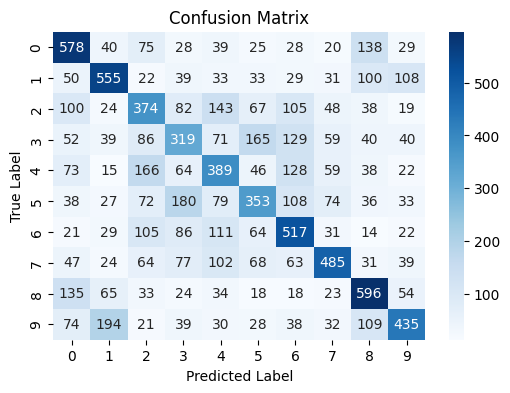

In [34]:
k = 1 #choose value of k here

# uncomment command A -> for Euclidean 
# uncomment command B -> for Cosine Similarity

#knn = KNeighborsClassifier(n_neighbors = k) # command A
knn = KNeighborsClassifier(n_neighbors = k, metric = 'cosine') # command B

knn.fit(x_train, y_train.ravel())
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"kNN with k = {k} achieved an accuracy score of {accuracy}\n")

print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Nearest Centroid algorithm achieved an accuracy score of  0.3277 

              precision    recall  f1-score   support

    airplane       0.31      0.54      0.40      1000
  automobile       0.31      0.30      0.31      1000
        bird       0.22      0.14      0.17      1000
         cat       0.26      0.19      0.22      1000
        deer       0.34      0.26      0.30      1000
         dog       0.30      0.27      0.28      1000
        frog       0.32      0.50      0.39      1000
       horse       0.42      0.26      0.32      1000
        ship       0.43      0.43      0.43      1000
       truck       0.35      0.40      0.37      1000

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.32     10000
weighted avg       0.33      0.33      0.32     10000



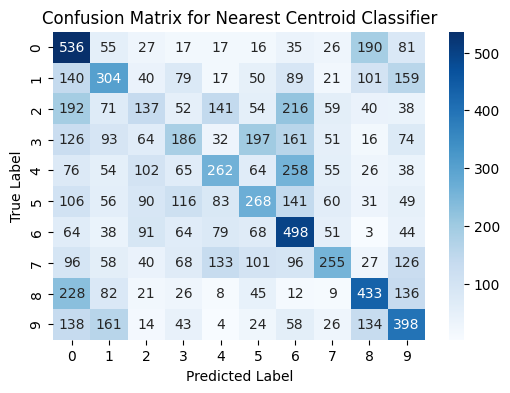

In [35]:
clf = NearestCentroid()
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Nearest Centroid algorithm achieved an accuracy score of ", accuracy, "\n");
print(classification_report(y_test, y_pred, target_names=class_names))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Nearest Centroid Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()